In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import random
import shutil
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
MobileNet = tf.keras.applications.mobilenet.MobileNet()

In [4]:
os.chdir("C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset")

In [5]:
if os.path.isdir("C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train\\0\\") is False:
    os.makedirs("C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train")
    os.makedirs("C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\valid")
    os.makedirs("C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\test")
    
    for i in range(0, 10):
        shutil.move(f"{i}", "C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train")
        os.mkdir(f'C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\valid\\{i}')
        os.mkdir(f'C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\test\\{i}')
    
        valid_samples = random.sample(os.listdir(path=f'C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train\\{i}'), 31)
        for j in valid_samples:
            shutil.move(f'C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train\\{i}\\{j}', f'C:\\Users\\Vivek K N\\Dogs-vs-Cats Dataset\\Hand Signals\\Dataset\\valid\\{i}')
            
        test_samples = random.sample(os.listdir(path=f'C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train\\{i}'), 5)
        for k in test_samples:
            shutil.move(f'C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train\\{i}\\{k}', f'C:\\Users\\Vivek K N\\Dogs-vs-Cats Dataset\\Hand Signals\\Dataset\\test\\{i}')

In [6]:
train_path = "C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\train"
test_path = "C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\test"
valid_path = "C:\\Users\\Vivek K N\\Images Dataset\\Hand Signals\\Dataset\\valid"

In [7]:
train_samples = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)
valid_samples = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=10)
test_samples = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 1702 images belonging to 10 classes.
Found 310 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [8]:
assert train_samples.n == 1702
assert valid_samples.n == 310
assert test_samples.n == 50

## Model Modification

In [9]:
MobileNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [10]:
x = MobileNet.layers[-2].output
output = Dense(units = 10, activation="softmax")(x)

In [11]:
model = Model(inputs = MobileNet.input, outputs=output)

In [12]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

## Train The Model

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.fit(x=train_samples, validation_data=valid_samples, epochs=10, verbose=2)

Epoch 1/10
171/171 - 28s - loss: 0.7500 - accuracy: 0.7955 - val_loss: 1.1580 - val_accuracy: 0.8097 - 28s/epoch - 161ms/step
Epoch 2/10
171/171 - 23s - loss: 0.1137 - accuracy: 0.9636 - val_loss: 0.1451 - val_accuracy: 0.9613 - 23s/epoch - 136ms/step
Epoch 3/10
171/171 - 23s - loss: 0.0291 - accuracy: 0.9929 - val_loss: 0.1740 - val_accuracy: 0.9581 - 23s/epoch - 135ms/step
Epoch 4/10
171/171 - 23s - loss: 0.0367 - accuracy: 0.9900 - val_loss: 0.1781 - val_accuracy: 0.9613 - 23s/epoch - 135ms/step
Epoch 5/10
171/171 - 23s - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.1552 - val_accuracy: 0.9677 - 23s/epoch - 134ms/step
Epoch 6/10
171/171 - 24s - loss: 0.0211 - accuracy: 0.9929 - val_loss: 0.2553 - val_accuracy: 0.9548 - 24s/epoch - 137ms/step
Epoch 7/10
171/171 - 23s - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.2991 - val_accuracy: 0.9258 - 23s/epoch - 135ms/step
Epoch 8/10
171/171 - 24s - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.2413 - val_accuracy: 0.9484 - 24s/epoch - 139

## Test The Model

In [16]:
test_labels = test_samples.classes

In [17]:
predictions = model.predict(test_samples, verbose=0)

In [18]:
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

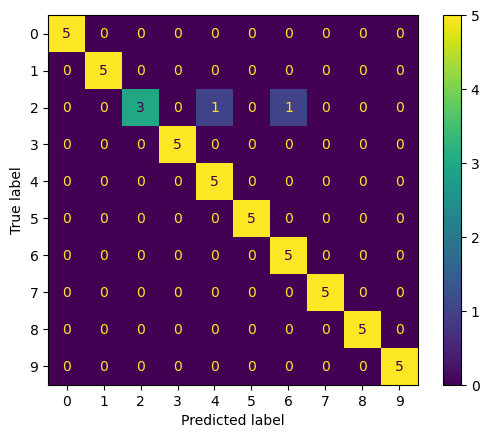

In [19]:
ConfusionMatrixDisplay(cm).plot()

In [20]:
from tensorflow.keras.saving import load_model, save_model

In [21]:
save_model(model, "D:\\Hand Signal Detection.keras")